# SVHN Dataset

### Data Preparation

In [14]:
#load the necessary modules
import pandas as pd
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import time

from sklearn.model_selection import cross_val_score
from keras.utils.vis_utils import plot_model
%matplotlib inline

In [6]:
#load your own path here where the datasets reside
path = '../ten-datasets/SVHN_dataset/'

#load the datasets
train_data = loadmat(path + 'train_32x32.mat')
test_data = loadmat(path + 'test_32x32.mat')

#assign the labels
train_labels = train_data['y'].reshape(73257,)
test_labels = test_data['y'].reshape(26032,)

In [7]:
#the raw data isn't quite in the right dimensional format so 'moveaxis' solves this problem
train_images = train_data['X']
train_images = np.moveaxis(train_images, -1, 0)

test_images = test_data['X']
test_images = np.moveaxis(test_images, -1, 0)


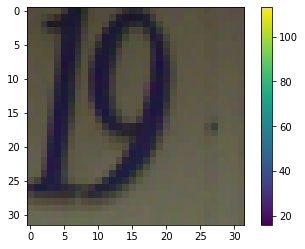

In [8]:
#Confirm the image is in the right format
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

In [9]:
#set the class names
class_names = ['1', '2', '3', '4', '5', '6', '7', '8', '9','10']
num_classes = len(class_names)

#unique confirms the number of classes
#np.unique(train_labels)

In [10]:
#confirm images are in correct format
train_images.shape

(73257, 32, 32, 3)

In [11]:
# Scale value to range 0 to 1 
train_images = train_images / 255.0
test_images = test_images / 255.0

In [12]:
#the following function gives some default classification metrics that can be re-used
def model_fit_report(model,x_values,y_values_actual,y_values_predicted,y_values_probability,labels):
    print("Model Fit Results")
    print("")
    print ("Accuracy: %0.3f" % accuracy_score(y_values_actual,y_values_predicted))
    print("")
    
        
    matrix = confusion_matrix(y_values_actual, y_values_predicted,labels)#labels=lb.classes_
    fig, ax = plt.subplots(figsize=(14, 12))
    sns.heatmap(matrix, annot=True, cmap='Greens', fmt='d', ax=ax)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted label')
    plt.xticks(np.arange(len(labels))+0.5,labels)
    plt.ylabel('True label')
    plt.yticks(np.arange(len(labels))+0.5,labels)
    plt.show()

    #print("Confusion Matrix")
    #CM = plot_confusion_matrix(model,x_values,y_values_actual,values_format = 'n')
    #print (CM)
    #print("")
    #print (confusion_matrix(y_values_actual,y_values_predicted))
    #print("")
    print("Classification Report")
    print("")
    print (classification_report(y_values_actual,y_values_predicted))

### Default CNN (Standard Approach From CIFAR Example

In [4]:
from keras.models import Sequential
from keras.layers import Input, Conv2D, BatchNormalization, Activation, MaxPooling2D, Dropout, Flatten, Dense, UpSampling2D
from keras.models import Model, Sequential

Using TensorFlow backend.
/Users/Tommy/opt/anaconda3/envs/python36/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/Tommy/opt/anaconda3/envs/python36/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/Tommy/opt/anaconda3/envs/python36/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/U

In [11]:
#bn_axis = 3

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=train_images.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes+1))#had to add 1 to num_classes to make it work
model.add(Activation('softmax'))

In [12]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
model.summary() 

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)       

In [14]:
hist = model.fit(train_images, train_labels, batch_size=128 ,epochs=5, validation_data=(test_images,test_labels))

Train on 73257 samples, validate on 26032 samples
Epoch 1/5
73257/73257 [==============================] - 231s 3ms/step - loss: 1.0763 - accuracy: 0.6430 - val_loss: 0.5041 - val_accuracy: 0.8515
Epoch 2/5
73257/73257 [==============================] - 275s 4ms/step - loss: 0.4913 - accuracy: 0.8511 - val_loss: 0.3955 - val_accuracy: 0.8827
Epoch 3/5
73257/73257 [==============================] - 221s 3ms/step - loss: 0.4145 - accuracy: 0.8754 - val_loss: 0.3482 - val_accuracy: 0.8989
Epoch 4/5
73257/73257 [==============================] - 221s 3ms/step - loss: 0.3673 - accuracy: 0.8896 - val_loss: 0.3322 - val_accuracy: 0.9028
Epoch 5/5
73257/73257 [==============================] - 275s 4ms/step - loss: 0.3397 - accuracy: 0.8974 - val_loss: 0.3145 - val_accuracy: 0.9114


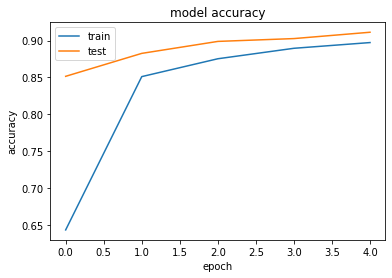

In [15]:
# summarize history for accuracy
plt.figure()
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [16]:
#calculate the test accuracy
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

#test accuracy of 0.9114

26032/26032 [==============================] - 29s 1ms/step
Test accuracy: 0.9113783240318298


In [17]:
#get the prediction for all test images
predictions = model.predict(test_images)

[3.7502144e-13 1.3560914e-04 6.3926689e-07 1.0154680e-06 9.9815959e-01
 7.9671445e-06 6.1639928e-04 6.6150612e-08 6.0981944e-05 6.3038856e-04
 3.8732361e-04]
Prediction Class is 4 with 1.00 probability
Actual Class Label is 4


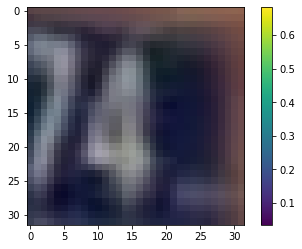

In [18]:
#review for a single test example
print (predictions[100])
print ('Prediction Class is %i with %0.2f probability' 
       % (np.argmax(predictions[100]),  predictions[100][np.argmax(predictions[100])])) 
print ("Actual Class Label is %i" % test_labels[100])

#print the image
plt.figure()
plt.imshow(test_images[100])
plt.colorbar()
plt.grid(False)
plt.show()

### Alternative CNN Configurations

20,20,40,40 - 600

In [10]:
model = Sequential()
model.add(Conv2D(20, (3, 3), padding='same', input_shape=train_images.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(20, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(40, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(40, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(600))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes+1))#had to add 1 to num_classes to make it work
model.add(Activation('softmax'))

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary() 

hist = model.fit(train_images, train_labels, batch_size=128 ,epochs=5, validation_data=(test_images,test_labels))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 20)        560       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 20)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 20)        3620      
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 20)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 20)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 20)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 40)       

20,40 - 600

In [11]:
model = Sequential()
model.add(Conv2D(20, (3, 3), padding='same', input_shape=train_images.shape[1:]))
model.add(Activation('relu'))
#model.add(Conv2D(20, (3, 3)))
#model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(40, (3, 3), padding='same'))
model.add(Activation('relu'))
#model.add(Conv2D(40, (3, 3)))
#model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(600))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes+1))#had to add 1 to num_classes to make it work
model.add(Activation('softmax'))

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary() 

hist = model.fit(train_images, train_labels, batch_size=128 ,epochs=5, validation_data=(test_images,test_labels))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 20)        560       
_________________________________________________________________
activation_7 (Activation)    (None, 32, 32, 20)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 20)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 16, 16, 20)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 40)        7240      
_________________________________________________________________
activation_8 (Activation)    (None, 16, 16, 40)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 40)         

20,20,20,40,40,40 - 600

In [12]:
model = Sequential()
model.add(Conv2D(20, (3, 3), padding='same', input_shape=train_images.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(20, (3, 3)))
model.add(Activation('relu'))
model.add(Conv2D(20, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(40, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(40, (3, 3)))
model.add(Activation('relu'))
model.add(Conv2D(40, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(600))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes+1))#had to add 1 to num_classes to make it work
model.add(Activation('softmax'))

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary() 

hist = model.fit(train_images, train_labels, batch_size=128 ,epochs=5, validation_data=(test_images,test_labels))

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 32, 20)        560       
_________________________________________________________________
activation_11 (Activation)   (None, 32, 32, 20)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 30, 30, 20)        3620      
_________________________________________________________________
activation_12 (Activation)   (None, 30, 30, 20)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 28, 28, 20)        3620      
_________________________________________________________________
activation_13 (Activation)   (None, 28, 28, 20)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 20)       

20,20,20,40,40,40 - 500

In [13]:
model = Sequential()
model.add(Conv2D(20, (3, 3), padding='same', input_shape=train_images.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(20, (3, 3)))
model.add(Activation('relu'))
model.add(Conv2D(20, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(40, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(40, (3, 3)))
model.add(Activation('relu'))
model.add(Conv2D(40, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(500))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes+1))#had to add 1 to num_classes to make it work
model.add(Activation('softmax'))

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary() 

hist = model.fit(train_images, train_labels, batch_size=128 ,epochs=5, validation_data=(test_images,test_labels))

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 32, 32, 20)        560       
_________________________________________________________________
activation_19 (Activation)   (None, 32, 32, 20)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 30, 30, 20)        3620      
_________________________________________________________________
activation_20 (Activation)   (None, 30, 30, 20)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 28, 28, 20)        3620      
_________________________________________________________________
activation_21 (Activation)   (None, 28, 28, 20)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 20)       

20,20,40,40,80,80,1024

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 32, 20)        560       
_________________________________________________________________
activation_9 (Activation)    (None, 32, 32, 20)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 30, 30, 20)        3620      
_________________________________________________________________
activation_10 (Activation)   (None, 30, 30, 20)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 20)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 15, 15, 20)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 15, 15, 40)       

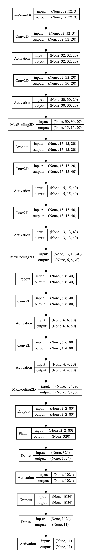

Train on 73257 samples, validate on 26032 samples
Epoch 1/5
 8448/73257 [==>...........................] - ETA: 10:47 - loss: 2.2740 - accuracy: 0.1880

In [ ]:
model = Sequential()
model.add(Conv2D(20, (3, 3), padding='same', input_shape=train_images.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(20, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(40, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(40, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(80, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(80, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes+1))#had to add 1 to num_classes to make it work
model.add(Activation('softmax'))

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary() 

image_name = 'svhn_cnn_model.png'
plot_model(model,to_file=image_name,show_shapes=True,show_layer_names=False,rankdir='TB')
plt.figure(figsize=(10,10))
img = plt.imread(image_name)
plt.imshow(img)
plt.axis('off')
plt.show()

hist = model.fit(train_images, train_labels, batch_size=128 ,epochs=5, validation_data=(test_images,test_labels))

40,40,80,80 - 1024

In [15]:
model = Sequential()
model.add(Conv2D(40, (3, 3), padding='same', input_shape=train_images.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(40, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(80, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(80, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes+1))#had to add 1 to num_classes to make it work
model.add(Activation('softmax'))

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary() 

hist = model.fit(train_images, train_labels, batch_size=128 ,epochs=5, validation_data=(test_images,test_labels))

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 32, 32, 40)        1120      
_________________________________________________________________
activation_35 (Activation)   (None, 32, 32, 40)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 30, 30, 40)        14440     
_________________________________________________________________
activation_36 (Activation)   (None, 30, 30, 40)        0         
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 15, 15, 40)        0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 15, 15, 40)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 15, 15, 80)       

### CNN Preprocessing for Shallow Learning

This first step takes the convolutional and pooling layers only to simplyfy the feature inputs which can then be used in various other shallow learning methods.

In [11]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=train_images.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

#model.add(Conv2D(64, (3, 3)))
#model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.5))


model.add(Flatten())
#model.add(Dense(512))
#model.add(Activation('relu'))
#model.add(Dropout(0.5))



In [12]:
#create the convoluted features
start_time =time.perf_counter()
conv_train = model.predict(train_images)
conv_test = model.predict(test_images)
end_time =time.perf_counter()

print('Prediction ran in %i seconds' % (end_time -start_time))

print(conv_train.shape)
print(conv_test.shape)

Prediction ran in 81 seconds


### SVM on convoluted feature input. Runs slowly so only a subset of images is used.

In [23]:
start_time =time.perf_counter()

from sklearn import svm

clf = svm.SVC(gamma='scale',verbose = True)
#clf.fit(x_train_svm,train_labels)
clf.fit(conv[0:10000],train_labels[0:10000])

end_time =time.perf_counter()

print('SVM ran in %i seconds' % (end_time -start_time))

[LibSVM]SVM ran in 622 seconds


In [ ]:
#print(clf.score(conv,train_labels)

In [ ]:
start_time =time.perf_counter()
y_train_predict = clf.predict(conv)
print ("SVM Train Accuracy: %.3f" % accuracy_score(train_labels,y_train_predict))
end_time =time.perf_counter()
print('Accuracy ran in %i seconds' % (end_time -start_time))


### Logistic Regression with convoluted data input (quick to run)

Model Fit Results

Accuracy: 0.737



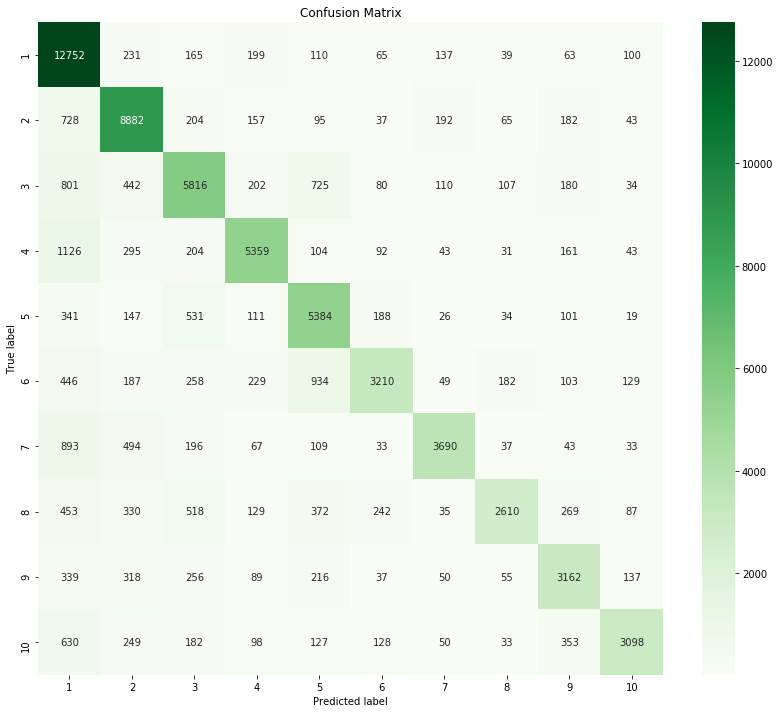

Classification Report

              precision    recall  f1-score   support

           1       0.69      0.92      0.79     13861
           2       0.77      0.84      0.80     10585
           3       0.70      0.68      0.69      8497
           4       0.81      0.72      0.76      7458
           5       0.66      0.78      0.72      6882
           6       0.78      0.56      0.65      5727
           7       0.84      0.66      0.74      5595
           8       0.82      0.52      0.63      5045
           9       0.68      0.68      0.68      4659
          10       0.83      0.63      0.71      4948

    accuracy                           0.74     73257
   macro avg       0.76      0.70      0.72     73257
weighted avg       0.75      0.74      0.73     73257

Model Fit Results

Accuracy: 0.711



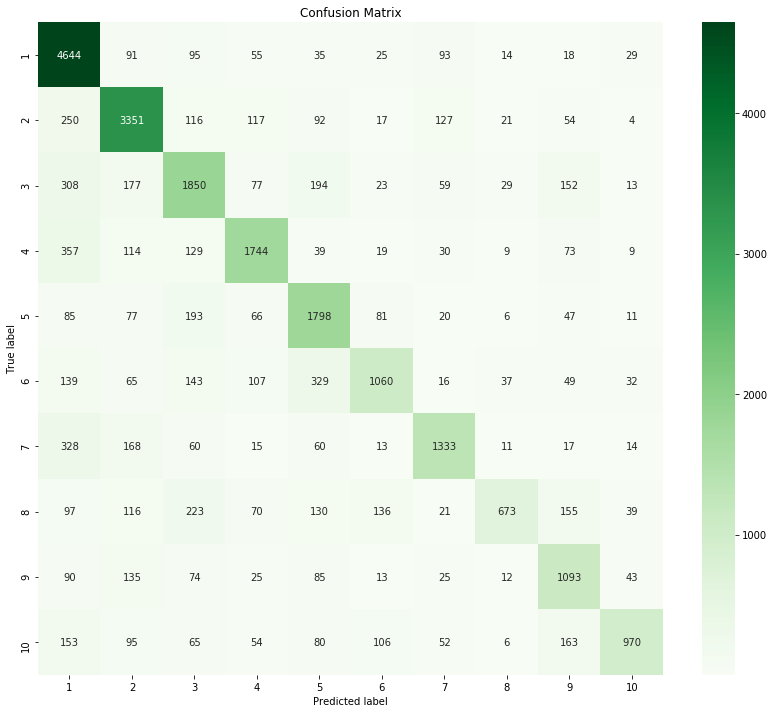

Classification Report

              precision    recall  f1-score   support

           1       0.72      0.91      0.80      5099
           2       0.76      0.81      0.78      4149
           3       0.63      0.64      0.63      2882
           4       0.75      0.69      0.72      2523
           5       0.63      0.75      0.69      2384
           6       0.71      0.54      0.61      1977
           7       0.75      0.66      0.70      2019
           8       0.82      0.41      0.54      1660
           9       0.60      0.69      0.64      1595
          10       0.83      0.56      0.67      1744

    accuracy                           0.71     26032
   macro avg       0.72      0.66      0.68     26032
weighted avg       0.72      0.71      0.70     26032



In [15]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=100,max_iter = 100, tol=.1,solver='sag')
lr.fit(conv_train,train_labels)


#need to add 1 to the assigned class, otherwise the classes start from zero which isn't correct.
y_train_predict = lr.predict_proba(conv_train).argmax(axis = 1)+1
model_fit_report(lr,conv_train,train_labels,y_train_predict,lr.predict_proba(conv_train),np.unique(train_labels))

y_test_predict = lr.predict_proba(conv_test).argmax(axis = 1)+1
model_fit_report(lr,conv_test,test_labels,y_test_predict,lr.predict_proba(conv_test),np.unique(test_labels))

### Random Forest with Convoluted Input (runs quick). Doesn't fit well.

Model Fit Results

Accuracy: 0.278



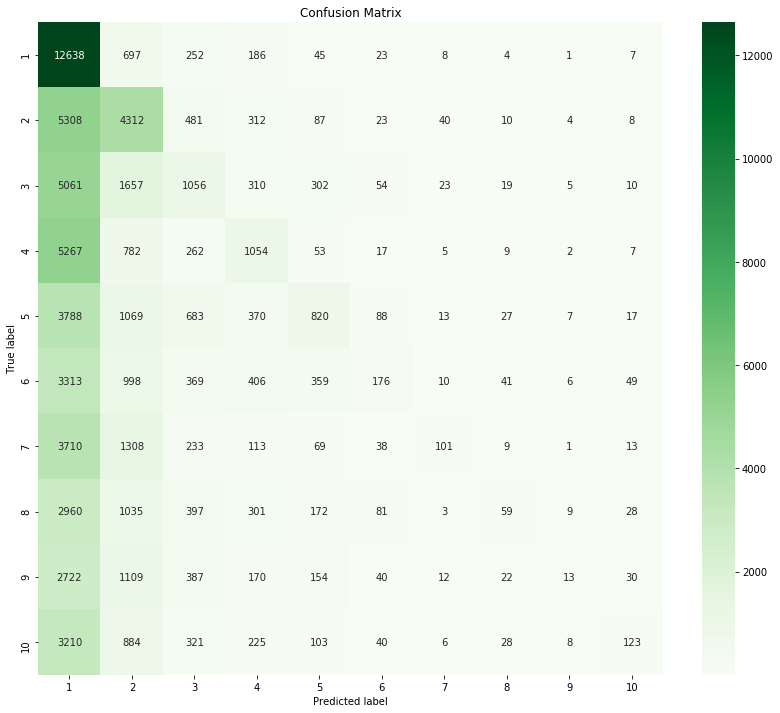

Classification Report

              precision    recall  f1-score   support

           1       0.26      0.91      0.41     13861
           2       0.31      0.41      0.35     10585
           3       0.24      0.12      0.16      8497
           4       0.31      0.14      0.19      7458
           5       0.38      0.12      0.18      6882
           6       0.30      0.03      0.06      5727
           7       0.46      0.02      0.03      5595
           8       0.26      0.01      0.02      5045
           9       0.23      0.00      0.01      4659
          10       0.42      0.02      0.05      4948

    accuracy                           0.28     73257
   macro avg       0.32      0.18      0.15     73257
weighted avg       0.31      0.28      0.20     73257

Model Fit Results

Accuracy: 0.273



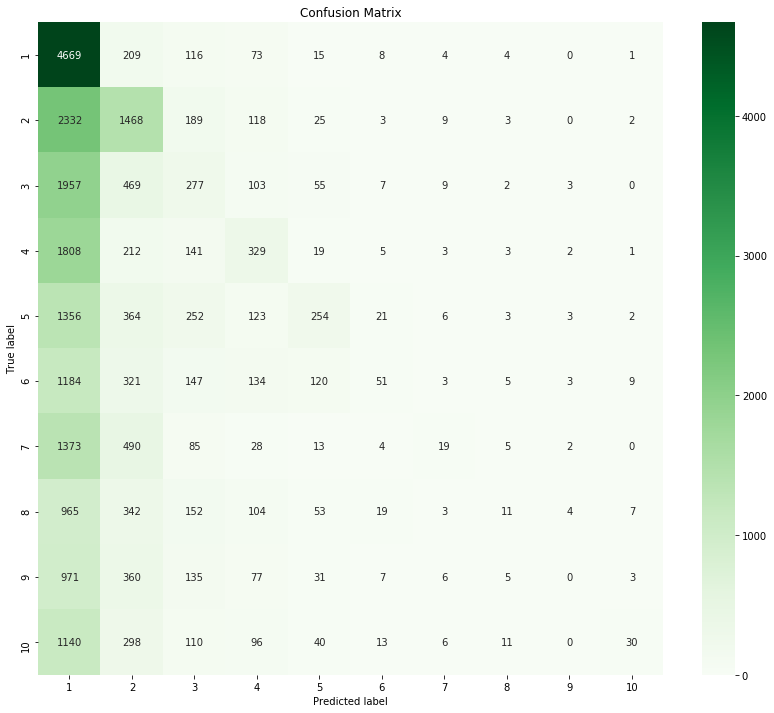

Classification Report

              precision    recall  f1-score   support

           1       0.26      0.92      0.41      5099
           2       0.32      0.35      0.34      4149
           3       0.17      0.10      0.12      2882
           4       0.28      0.13      0.18      2523
           5       0.41      0.11      0.17      2384
           6       0.37      0.03      0.05      1977
           7       0.28      0.01      0.02      2019
           8       0.21      0.01      0.01      1660
           9       0.00      0.00      0.00      1595
          10       0.55      0.02      0.03      1744

    accuracy                           0.27     26032
   macro avg       0.28      0.17      0.13     26032
weighted avg       0.29      0.27      0.19     26032



In [16]:
from sklearn.ensemble import RandomForestClassifier


forest = RandomForestClassifier(criterion='gini', n_estimators = 100, random_state =1,max_samples =100)
forest.fit(conv_train,train_labels)

#get the training results
y_train_predict = forest.predict(conv_train)
model_fit_report(forest,conv_train,train_labels,
                 y_train_predict,forest.predict_proba(conv_train),np.unique(train_labels))

#get the test results
y_test_predict = forest.predict(conv_test)
model_fit_report(forest,conv_test,test_labels
                 ,y_test_predict,forest.predict_proba(conv_test),np.unique(train_labels))



### Pure Shallow Learning Data Preprocessing

In [10]:
#reshape the training data so it is suitable for shallow learning
x_train_raw=train_images.reshape((len(train_images)),-1) #for svm
x_test_raw=test_images.reshape((len(test_images)),-1)
print (x_train_raw.shape)
print (x_test_raw.shape)


(73257, 3072)
(26032, 3072)


### SVM Method
Struggling to run on more that a few thousand images!

In [17]:
from sklearn import svm

clf = svm.SVC(gamma='scale',verbose = True)
#clf.fit(x_train_svm,train_labels)
clf.fit(x_train_raw[0:5000],train_labels[0:5000])

NameError: name 'x_train_raw' is not defined

In [ ]:
clf.predict(x_test_raw[0:5000])

In [25]:
print(clf.score(x_test_raw[0:5000],test_labels[0:5000]))

NameError: name 'x_test_svm' is not defined

Reduce Dimensions with PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 10)
x_train_pca = pca.fit_transform(x_train_raw[0:5000])
#x_test_pca = pca.fit_transform(x_test_svm)
np.set_printoptions(suppress = True)
print(pca.explained_variance_ratio_)

### Random Forest

Kernel dies if training samples is too high

Model Fit Results

Accuracy: 0.229



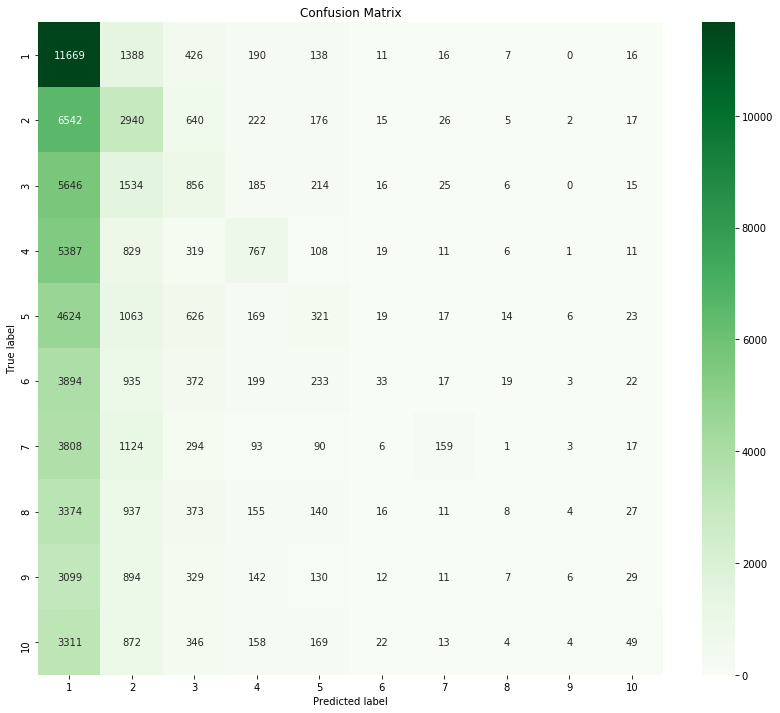

Classification Report

              precision    recall  f1-score   support

           1       0.23      0.84      0.36     13861
           2       0.23      0.28      0.25     10585
           3       0.19      0.10      0.13      8497
           4       0.34      0.10      0.16      7458
           5       0.19      0.05      0.07      6882
           6       0.20      0.01      0.01      5727
           7       0.52      0.03      0.05      5595
           8       0.10      0.00      0.00      5045
           9       0.21      0.00      0.00      4659
          10       0.22      0.01      0.02      4948

    accuracy                           0.23     73257
   macro avg       0.24      0.14      0.11     73257
weighted avg       0.24      0.23      0.15     73257

Model Fit Results

Accuracy: 0.235



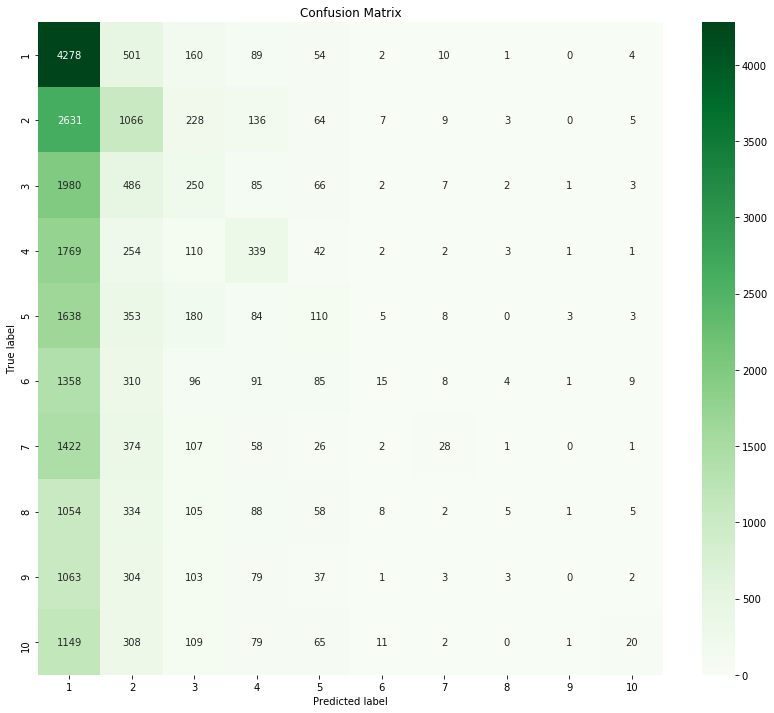

Classification Report

              precision    recall  f1-score   support

           1       0.23      0.84      0.37      5099
           2       0.25      0.26      0.25      4149
           3       0.17      0.09      0.12      2882
           4       0.30      0.13      0.19      2523
           5       0.18      0.05      0.07      2384
           6       0.27      0.01      0.01      1977
           7       0.35      0.01      0.03      2019
           8       0.23      0.00      0.01      1660
           9       0.00      0.00      0.00      1595
          10       0.38      0.01      0.02      1744

    accuracy                           0.23     26032
   macro avg       0.24      0.14      0.11     26032
weighted avg       0.24      0.23      0.15     26032



In [11]:
from sklearn.ensemble import RandomForestClassifier

samples = 73257


forest = RandomForestClassifier(criterion='gini', n_estimators = 100, random_state =1,max_samples =100)
forest.fit(x_train_raw[0:samples],train_labels[0:samples])

#get the training results
y_train_predict = forest.predict(x_train_raw[0:samples])
model_fit_report(forest,x_train_raw[0:samples],train_labels[0:samples],
                 y_train_predict,forest.predict_proba(x_train_raw[0:samples]),np.unique(train_labels))

#get the test results
y_test_predict = forest.predict(x_test_raw[0:samples])
model_fit_report(forest,x_test_raw[0:samples],test_labels[0:samples]
                 ,y_test_predict,forest.predict_proba(x_test_raw[0:samples]),np.unique(train_labels))



### Logistic Regression on Raw Inputs

Model Fit Results

Accuracy: 0.235



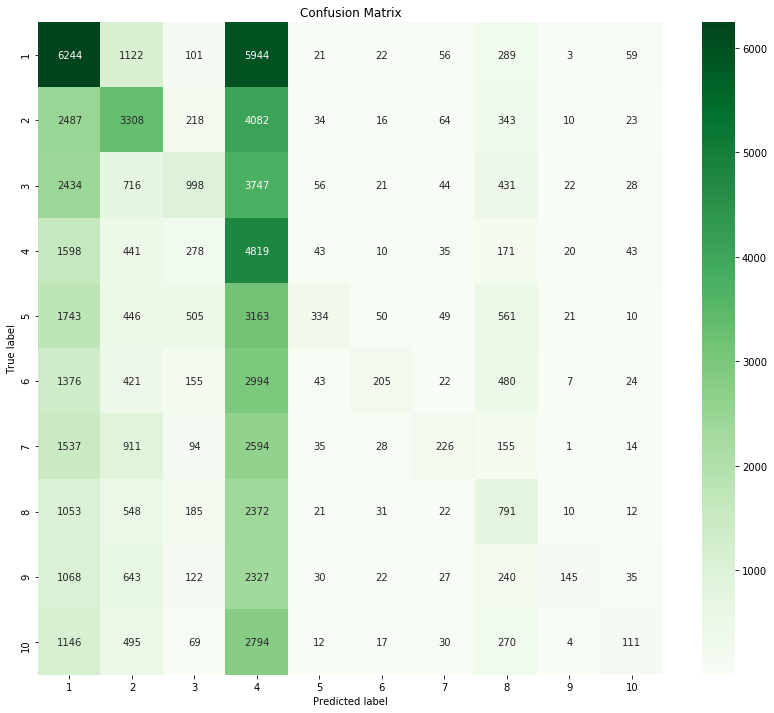

Classification Report

              precision    recall  f1-score   support

           1       0.30      0.45      0.36     13861
           2       0.37      0.31      0.34     10585
           3       0.37      0.12      0.18      8497
           4       0.14      0.65      0.23      7458
           5       0.53      0.05      0.09      6882
           6       0.49      0.04      0.07      5727
           7       0.39      0.04      0.07      5595
           8       0.21      0.16      0.18      5045
           9       0.60      0.03      0.06      4659
          10       0.31      0.02      0.04      4948

    accuracy                           0.23     73257
   macro avg       0.37      0.19      0.16     73257
weighted avg       0.36      0.23      0.20     73257

Model Fit Results

Accuracy: 0.185



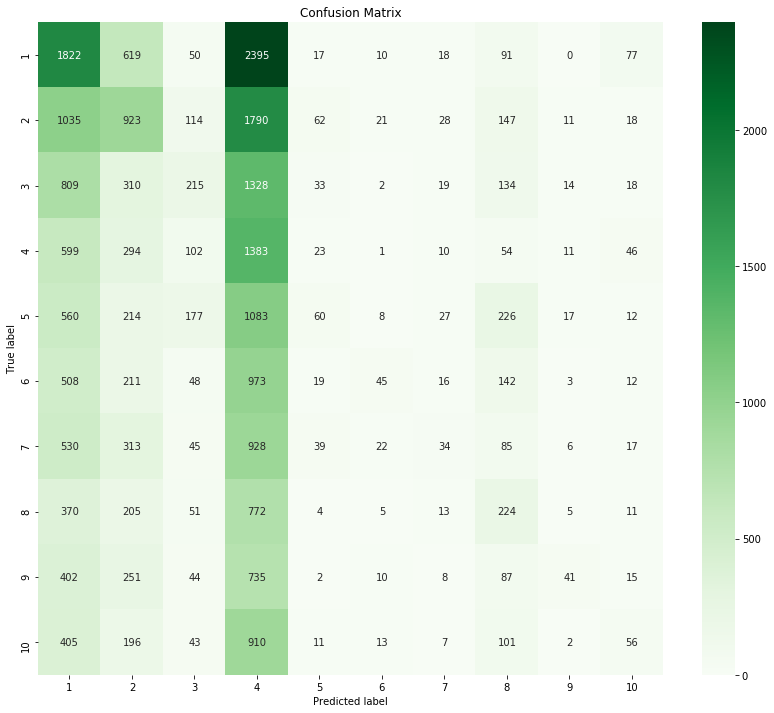

Classification Report

              precision    recall  f1-score   support

           1       0.26      0.36      0.30      5099
           2       0.26      0.22      0.24      4149
           3       0.24      0.07      0.11      2882
           4       0.11      0.55      0.19      2523
           5       0.22      0.03      0.05      2384
           6       0.33      0.02      0.04      1977
           7       0.19      0.02      0.03      2019
           8       0.17      0.13      0.15      1660
           9       0.37      0.03      0.05      1595
          10       0.20      0.03      0.06      1744

    accuracy                           0.18     26032
   macro avg       0.24      0.15      0.12     26032
weighted avg       0.24      0.18      0.15     26032



In [13]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=100,max_iter = 100, tol=.1,solver='sag')
lr.fit(x_train_raw,train_labels)


#need to add 1 to the assigned class, otherwise the classes start from zero which isn't correct.
y_train_predict = lr.predict_proba(x_train_raw).argmax(axis = 1)+1
model_fit_report(lr,x_train_raw,train_labels,y_train_predict,lr.predict_proba(x_train_raw),np.unique(train_labels))

y_test_predict = lr.predict_proba(x_test_raw).argmax(axis = 1)+1
model_fit_report(lr,x_test_raw,test_labels,y_test_predict,lr.predict_proba(x_test_raw),np.unique(test_labels))

### Logistic Regression Using Shallow Encoded Data

In [11]:
#reshape the data for the standard autoencoder
train_x = train_images.reshape((len(train_images), np.prod(train_images.shape[1:])))
test_x = test_images.reshape((len(test_images), np.prod(test_images.shape[1:])))

print (train_x.shape)

(73257, 3072)


In [14]:
#standard encoder

# this is our input placeholder
input_img = Input(shape=(3072,))

# "encoded" is the encoded representation of the input

encoded = Dense(512, activation='relu')(input_img)


# "decoded" is the lossy reconstruction of the input
decoded = Dense(3072, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
enc = Model(input_img,encoded)

autoencoder.summary()
enc.summary()

# compile model
#autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
autoencoder.compile(optimizer='adadelta', loss='mse')

print(train_x.shape)

hist = autoencoder.fit(train_x, train_x,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(test_x, test_x))

encode_imgs_train = enc.predict(train_x) 
encode_imgs_test = enc.predict(test_x) 


print(encode_imgs_test.shape)



Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_4 (Dense)              (None, 3072)              1575936   
Total params: 3,149,312
Trainable params: 3,149,312
Non-trainable params: 0
_________________________________________________________________
Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               1573376   
Total params: 1,573,376
Trainabl

In [26]:
#encode_imgs_test = encode_imgs_test.reshape(len(train_images),np.prod(encode_imgs_test.shape[1:]))

In [27]:
#encode_imgs_test.shape

(73257, 2048)

Logistic Regression with encoded inputs

Model Fit Results

Accuracy: 0.495



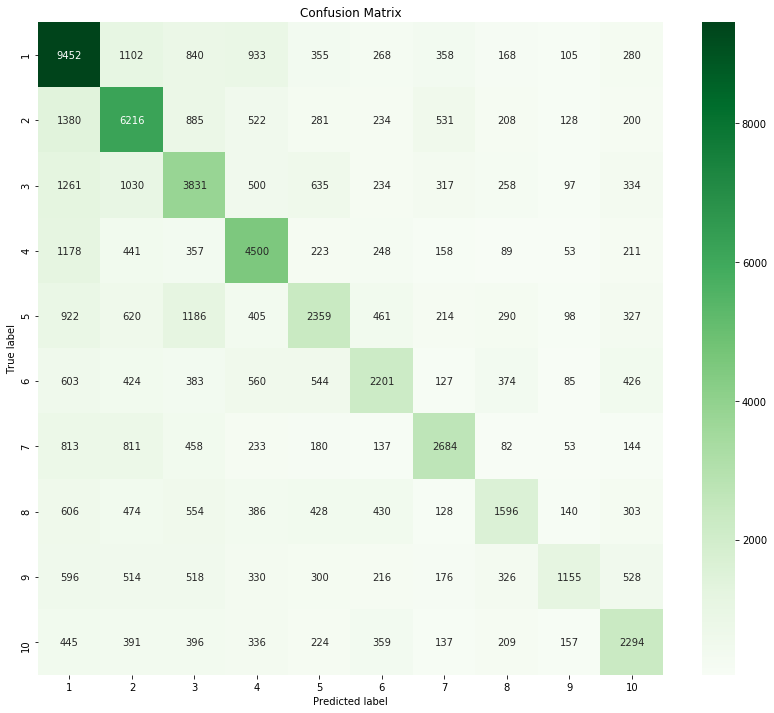

Classification Report

              precision    recall  f1-score   support

           1       0.55      0.68      0.61     13861
           2       0.52      0.59      0.55     10585
           3       0.41      0.45      0.43      8497
           4       0.52      0.60      0.56      7458
           5       0.43      0.34      0.38      6882
           6       0.46      0.38      0.42      5727
           7       0.56      0.48      0.51      5595
           8       0.44      0.32      0.37      5045
           9       0.56      0.25      0.34      4659
          10       0.45      0.46      0.46      4948

    accuracy                           0.50     73257
   macro avg       0.49      0.46      0.46     73257
weighted avg       0.49      0.50      0.49     73257

Model Fit Results

Accuracy: 0.490



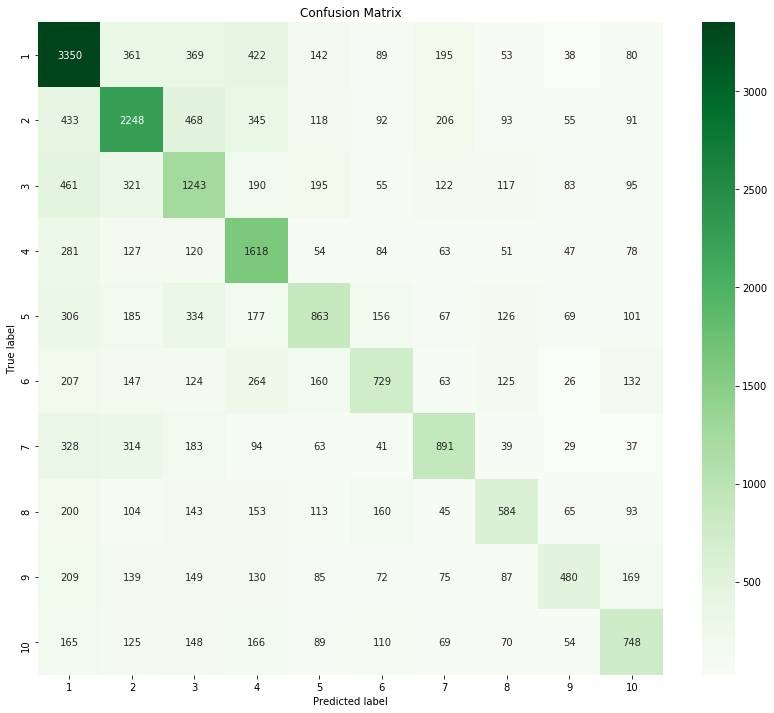

Classification Report

              precision    recall  f1-score   support

           1       0.56      0.66      0.61      5099
           2       0.55      0.54      0.55      4149
           3       0.38      0.43      0.40      2882
           4       0.45      0.64      0.53      2523
           5       0.46      0.36      0.40      2384
           6       0.46      0.37      0.41      1977
           7       0.50      0.44      0.47      2019
           8       0.43      0.35      0.39      1660
           9       0.51      0.30      0.38      1595
          10       0.46      0.43      0.44      1744

    accuracy                           0.49     26032
   macro avg       0.48      0.45      0.46     26032
weighted avg       0.49      0.49      0.48     26032



In [15]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=100,max_iter = 100, tol=.1,solver='sag')
lr.fit(encode_imgs_train,train_labels)


#need to add 1 to the assigned class, otherwise the classes start from zero which isn't correct.
y_train_predict = lr.predict_proba(encode_imgs_train).argmax(axis = 1)+1
model_fit_report(lr,encode_imgs_train,train_labels,y_train_predict,lr.predict_proba(encode_imgs_train),np.unique(train_labels))

#need to add 1 to the assigned class, otherwise the classes start from zero which isn't correct.
y_test_predict = lr.predict_proba(encode_imgs_test).argmax(axis = 1)+1
model_fit_report(lr,encode_imgs_test,test_labels,y_test_predict,lr.predict_proba(encode_imgs_test),np.unique(test_labels))

Random Forest with encoded inputs

Model Fit Results

Accuracy: 0.248



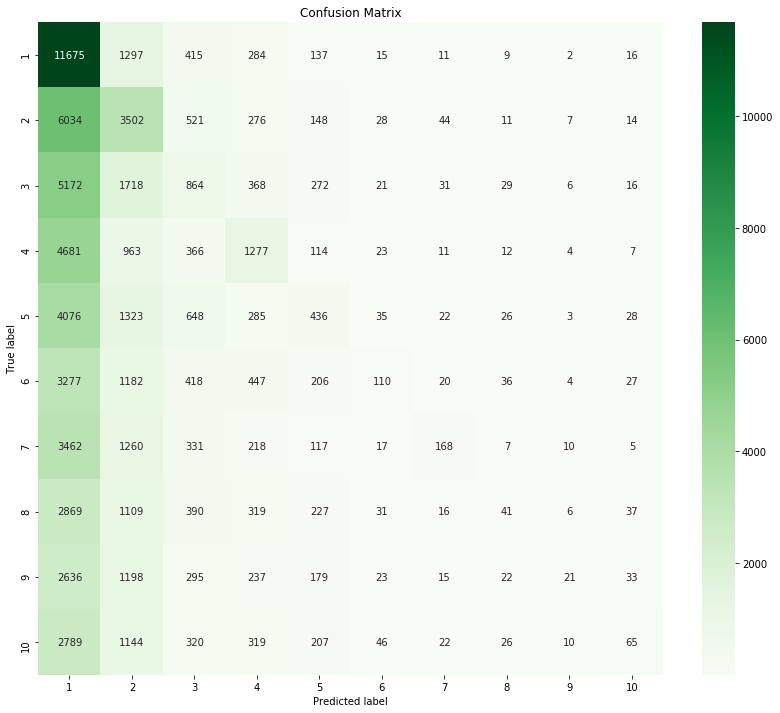

Classification Report

              precision    recall  f1-score   support

           1       0.25      0.84      0.39     13861
           2       0.24      0.33      0.28     10585
           3       0.19      0.10      0.13      8497
           4       0.32      0.17      0.22      7458
           5       0.21      0.06      0.10      6882
           6       0.32      0.02      0.04      5727
           7       0.47      0.03      0.06      5595
           8       0.19      0.01      0.02      5045
           9       0.29      0.00      0.01      4659
          10       0.26      0.01      0.03      4948

    accuracy                           0.25     73257
   macro avg       0.27      0.16      0.13     73257
weighted avg       0.27      0.25      0.17     73257

Model Fit Results

Accuracy: 0.257



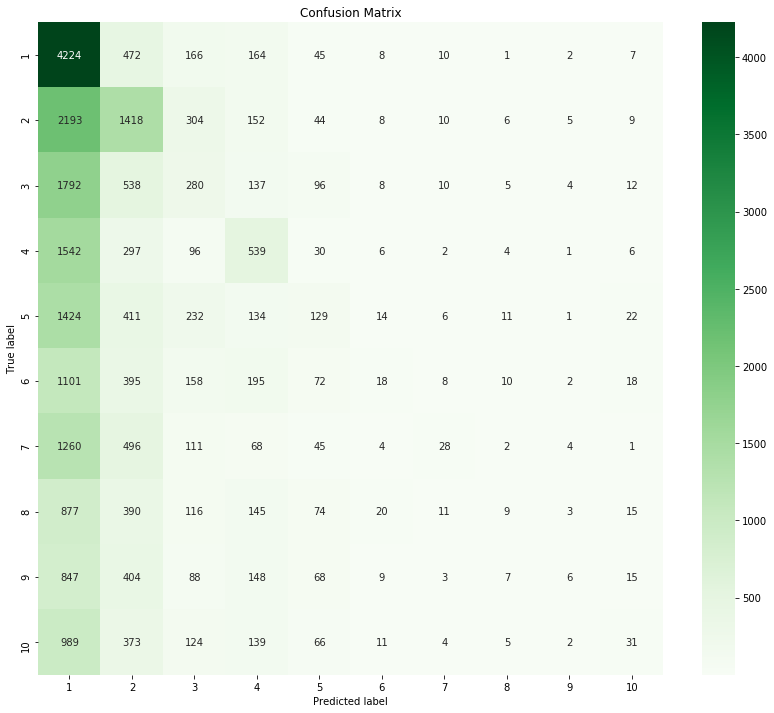

Classification Report

              precision    recall  f1-score   support

           1       0.26      0.83      0.40      5099
           2       0.27      0.34      0.30      4149
           3       0.17      0.10      0.12      2882
           4       0.30      0.21      0.25      2523
           5       0.19      0.05      0.08      2384
           6       0.17      0.01      0.02      1977
           7       0.30      0.01      0.03      2019
           8       0.15      0.01      0.01      1660
           9       0.20      0.00      0.01      1595
          10       0.23      0.02      0.03      1744

    accuracy                           0.26     26032
   macro avg       0.22      0.16      0.12     26032
weighted avg       0.23      0.26      0.18     26032



In [16]:
from sklearn.ensemble import RandomForestClassifier


forest = RandomForestClassifier(criterion='gini', n_estimators = 100, random_state =1,max_samples =100)
forest.fit(encode_imgs_train,train_labels)

#get the training results
y_train_predict = forest.predict(encode_imgs_train)
model_fit_report(forest,encode_imgs_train,train_labels,
                 y_train_predict,forest.predict_proba(encode_imgs_train),np.unique(train_labels))

#get the test results
y_test_predict = forest.predict(encode_imgs_test)
model_fit_report(forest,encode_imgs_test,test_labels
                 ,y_test_predict,forest.predict_proba(encode_imgs_test),np.unique(test_labels))



### Convoluted Encoder With Logistic Regression

In [20]:
#reshape the data for the convoluted autoencoder
train_x = train_images
test_x = test_images

train_x.shape


(73257, 32, 32, 3)

In [15]:
#convoluted encoder

# this is our input placeholder
input_img = Input(shape=(32,32,3))

encoded = Conv2D(8, (3, 3), activation='relu', padding='same')(input_img) #28 x 28 x 32
encoded = MaxPooling2D(pool_size=(2, 2))(encoded) #14 x 14 x 32
encoded = Conv2D(16, (3, 3), activation='relu', padding='same')(encoded) #14 x 14 x 64
encoded = MaxPooling2D(pool_size=(2, 2))(encoded) #7 x 7 x 64
encoded = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded) #7 x 7 x 128 (small and thick)

#encoded = Dense(256, activation='relu')(encoded)

#decoder
decoded = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded) #7 x 7 x 128
decoded = UpSampling2D((2,2))(decoded) # 14 x 14 x 128
decoded = Conv2D(16, (3, 3), activation='relu', padding='same')(decoded) # 14 x 14 x 64
decoded = UpSampling2D((2,2))(decoded) # 28 x 28 x 64
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(decoded) # 28 x 28 x 1


# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
enc = Model(input_img,encoded)

autoencoder.summary()
enc.summary()

# compile model
#autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
autoencoder.compile(optimizer='adadelta', loss='mse')

hist = autoencoder.fit(train_x, train_x,
                epochs=1,
                batch_size=256,
                shuffle=True,
                validation_data=(test_x, test_x))

encode_imgs_test = enc.predict(train_x)

encode_imgs_test = encode_imgs_test.reshape(len(train_images),np.prod(encode_imgs_test.shape[1:]))

encode_imgs_test.shape

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 8)         224       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 16)        1168      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 16)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 32)          4640      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 32)          9248

(73257, 2048)

Model Fit Results

Accuracy: 0.627



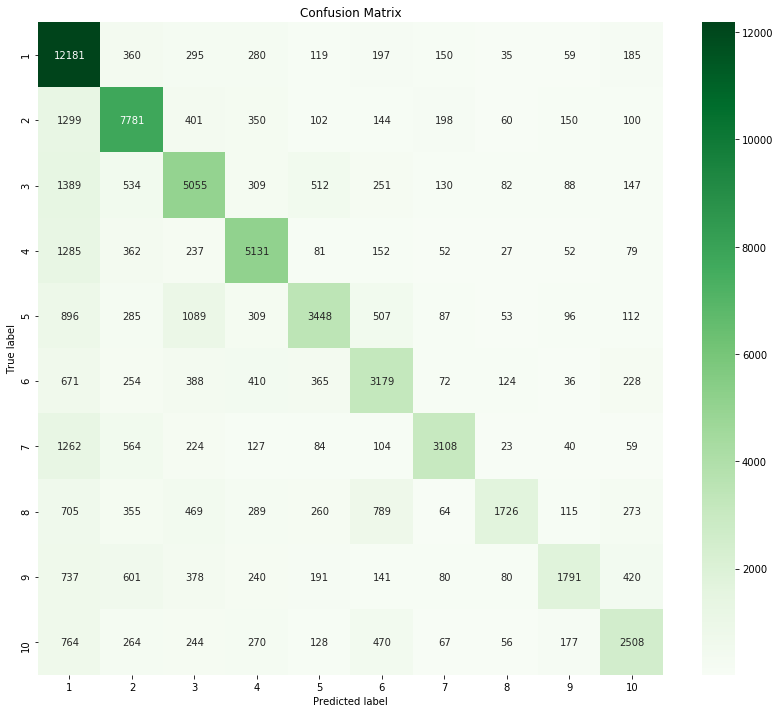

Classification Report

              precision    recall  f1-score   support

           1       0.57      0.88      0.70     13861
           2       0.68      0.74      0.71     10585
           3       0.58      0.59      0.59      8497
           4       0.67      0.69      0.68      7458
           5       0.65      0.50      0.57      6882
           6       0.54      0.56      0.55      5727
           7       0.78      0.56      0.65      5595
           8       0.76      0.34      0.47      5045
           9       0.69      0.38      0.49      4659
          10       0.61      0.51      0.55      4948

    accuracy                           0.63     73257
   macro avg       0.65      0.57      0.59     73257
weighted avg       0.64      0.63      0.62     73257



In [16]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=100,max_iter = 100, tol=.1,solver='sag')
lr.fit(encode_imgs_test,train_labels)


#need to add 1 to the assigned class, otherwise the classes start from zero which isn't correct.
y_train_predict = lr.predict_proba(encode_imgs_test).argmax(axis = 1)+1
model_fit_report(lr,encode_imgs_test,train_labels,y_train_predict,lr.predict_proba(encode_imgs_test),np.unique(train_labels))

### Deep Encoder with Logistic Regression

In [21]:
#deep encoder

# this is our input placeholder
input_img = Input(shape=(3072,))

# "encoded" is the encoded representation of the input
encoded = Dense(1024, activation='relu')(input_img)

encoded = Dense(512, activation='relu')(encoded)

decoded = Dense(1024, activation='sigmoid')(encoded)

# "decoded" is the lossy reconstruction of the input
decoded = Dense(3072, activation='sigmoid')(decoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
enc = Model(input_img,encoded)

autoencoder.summary()
enc.summary()

# compile model
#autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
autoencoder.compile(optimizer='adadelta', loss='mse')

print(train_x.shape)

hist = autoencoder.fit(train_x, train_x,
                epochs=1,
                batch_size=256,
                shuffle=True,
                validation_data=(test_x, test_x))

encode_imgs_train = enc.predict(train_x) 
print(encode_imgs_train.shape)
encode_imgs_train = encode_imgs_train.reshape(len(train_images),np.prod(encode_imgs_test.shape[1:]))
print(encode_imgs_train.shape)

encode_imgs_test = enc.predict(test_x) 
print(encode_imgs_test.shape)
encode_imgs_test = encode_imgs_test.reshape(len(test_images),np.prod(encode_imgs_test.shape[1:]))
print(encode_imgs_test.shape)



Model: "model_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_17 (Dense)             (None, 1024)              3146752   
_________________________________________________________________
dense_18 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_19 (Dense)             (None, 1024)              525312    
_________________________________________________________________
dense_20 (Dense)             (None, 3072)              3148800   
Total params: 7,345,664
Trainable params: 7,345,664
Non-trainable params: 0
_________________________________________________________________
Model: "model_12"
_________________________________________________________________
Layer (type)                 O

Model Fit Results

Accuracy: 0.407



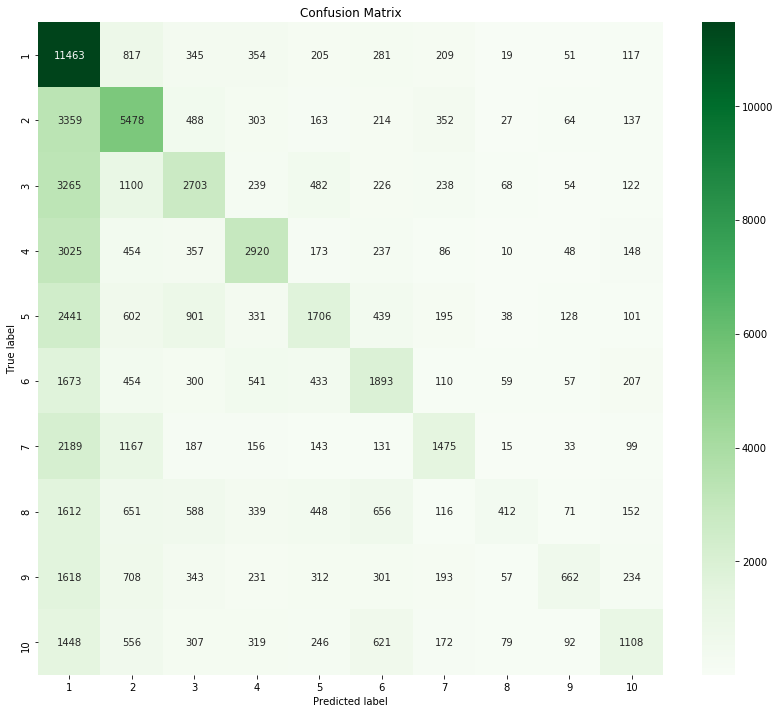

Classification Report

              precision    recall  f1-score   support

           1       0.36      0.83      0.50     13861
           2       0.46      0.52      0.49     10585
           3       0.41      0.32      0.36      8497
           4       0.51      0.39      0.44      7458
           5       0.40      0.25      0.30      6882
           6       0.38      0.33      0.35      5727
           7       0.47      0.26      0.34      5595
           8       0.53      0.08      0.14      5045
           9       0.53      0.14      0.22      4659
          10       0.46      0.22      0.30      4948

    accuracy                           0.41     73257
   macro avg       0.45      0.33      0.34     73257
weighted avg       0.44      0.41      0.38     73257

Model Fit Results

Accuracy: 0.419



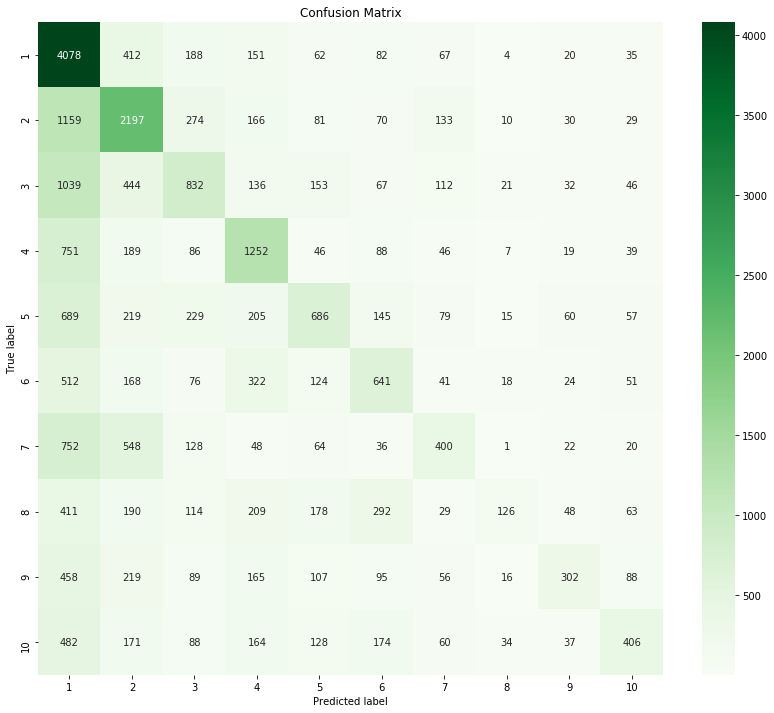

Classification Report

              precision    recall  f1-score   support

           1       0.39      0.80      0.53      5099
           2       0.46      0.53      0.49      4149
           3       0.40      0.29      0.33      2882
           4       0.44      0.50      0.47      2523
           5       0.42      0.29      0.34      2384
           6       0.38      0.32      0.35      1977
           7       0.39      0.20      0.26      2019
           8       0.50      0.08      0.13      1660
           9       0.51      0.19      0.28      1595
          10       0.49      0.23      0.31      1744

    accuracy                           0.42     26032
   macro avg       0.44      0.34      0.35     26032
weighted avg       0.43      0.42      0.39     26032



In [22]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=100,max_iter = 100, tol=.1,solver='sag')
lr.fit(encode_imgs_train,train_labels)


#need to add 1 to the assigned class, otherwise the classes start from zero which isn't correct.
y_train_predict = lr.predict_proba(encode_imgs_train).argmax(axis = 1)+1
model_fit_report(lr,encode_imgs_train,train_labels,y_train_predict,lr.predict_proba(encode_imgs_train),np.unique(train_labels))

y_test_predict = lr.predict_proba(encode_imgs_test).argmax(axis = 1)+1
model_fit_report(lr,encode_imgs_test,test_labels,y_test_predict,lr.predict_proba(encode_imgs_test),np.unique(test_labels))

### Deep Encoder with Random Forest

Model Fit Results

Accuracy: 0.227



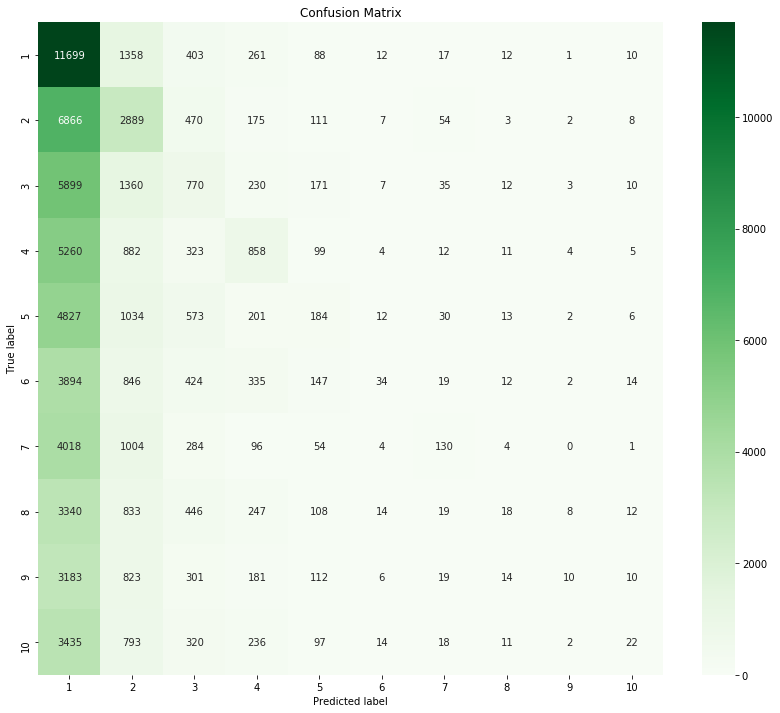

Classification Report

              precision    recall  f1-score   support

           1       0.22      0.84      0.35     13861
           2       0.24      0.27      0.26     10585
           3       0.18      0.09      0.12      8497
           4       0.30      0.12      0.17      7458
           5       0.16      0.03      0.05      6882
           6       0.30      0.01      0.01      5727
           7       0.37      0.02      0.04      5595
           8       0.16      0.00      0.01      5045
           9       0.29      0.00      0.00      4659
          10       0.22      0.00      0.01      4948

    accuracy                           0.23     73257
   macro avg       0.25      0.14      0.10     73257
weighted avg       0.24      0.23      0.14     73257

Model Fit Results

Accuracy: 0.240



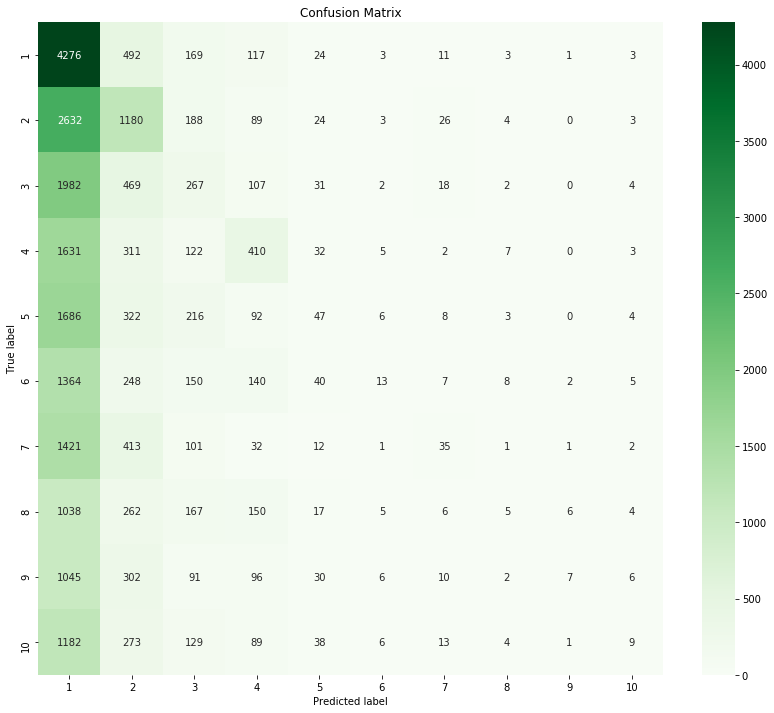

Classification Report

              precision    recall  f1-score   support

           1       0.23      0.84      0.37      5099
           2       0.28      0.28      0.28      4149
           3       0.17      0.09      0.12      2882
           4       0.31      0.16      0.21      2523
           5       0.16      0.02      0.04      2384
           6       0.26      0.01      0.01      1977
           7       0.26      0.02      0.03      2019
           8       0.13      0.00      0.01      1660
           9       0.39      0.00      0.01      1595
          10       0.21      0.01      0.01      1744

    accuracy                           0.24     26032
   macro avg       0.24      0.14      0.11     26032
weighted avg       0.24      0.24      0.16     26032



In [23]:
from sklearn.ensemble import RandomForestClassifier


forest = RandomForestClassifier(criterion='gini', n_estimators = 100, random_state =1,max_samples =100)
forest.fit(encode_imgs_train,train_labels)

#get the training results
y_train_predict = forest.predict(encode_imgs_train)
model_fit_report(forest,encode_imgs_train,train_labels,
                 y_train_predict,forest.predict_proba(encode_imgs_train),np.unique(train_labels))

#get the test results
y_test_predict = forest.predict(encode_imgs_test)
model_fit_report(forest,encode_imgs_test,test_labels
                 ,y_test_predict,forest.predict_proba(encode_imgs_test),np.unique(test_labels))


### MLP

In [9]:
#convert labels to binary format
from keras.utils import to_categorical
y_train_binary = to_categorical(train_labels)
y_test_binary = to_categorical(test_labels)

#reshape the data MLP
train_x = train_images.reshape((len(train_images), np.prod(train_images.shape[1:])))
test_x = test_images.reshape((len(test_images), np.prod(test_images.shape[1:])))

print (train_x.shape)


Using TensorFlow backend.


(73257, 3072)


In [12]:
#deeper with less neurons generates better results

model = Sequential()

model.add(
    Dense(
        units = 100, 
        input_dim = train_x.shape[1],
        kernel_initializer='glorot_uniform',
        bias_initializer='zeros',
        activation ='relu'))


model.add(
    Dense(
        units = 100, 
        input_dim = 100,
        kernel_initializer='glorot_uniform',
        bias_initializer='zeros',
        activation ='relu'))

model.add(
    Dense(
        units = 100, 
        input_dim = 100,
        kernel_initializer='glorot_uniform',
        bias_initializer='zeros',
        activation ='relu'))

#model.add(Dropout(0.5))

model.add(
    Dense(
    units=y_train_binary.shape[1],
    input_dim=100,
    kernel_initializer='glorot_uniform',
    bias_initializer='zeros',
    activation ='softmax'))



#model.compile(optimizer=sgd_optimiser,loss ='categorical_crossentropy')
model.compile(optimizer='adam',loss ='categorical_crossentropy',metrics=['accuracy'])
model.summary()
history = model.fit(train_x,y_train_binary,batch_size=50,epochs =10, verbose =1, 
                    validation_data=(test_x,y_test_binary))


#training results
y_train_predict = model.predict_classes(train_x,verbose=0)
print ("Keras MLP Train Accuracy: %.3f" % accuracy_score(train_labels,y_train_predict))
#print(confusion_matrix(train_labels,y_train_predict))
#testing results
y_test_predict = model.predict_classes(test_x,verbose=0)
print ("Keras MLP Test Accuracy: %.3f" % accuracy_score(test_labels,y_test_predict))
#print(confusion_matrix(y_test,y_test_predict))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               307300    
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 11)                1111      
Total params: 328,611
Trainable params: 328,611
Non-trainable params: 0
_________________________________________________________________
Train on 73257 samples, validate on 26032 samples
Epoch 1/10
73257/73257 [==============================] - 20s 272us/step - loss: 2.1573 - accuracy: 0.2191 - val_loss: 2.0049 - val_accuracy: 0.3105
Epoch 2/10
73257/73257 [=======================